In [1]:
# Importar librerias

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-29 17:35:07.178403: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Cargar datos
url = "https://raw.githubusercontent.com/alejocampos1/AI-Projects/main/Proyecto%202/datos_de_ventas.csv"
sales_df = pd.read_csv(url)

<Axes: xlabel='Temperature', ylabel='Revenue'>

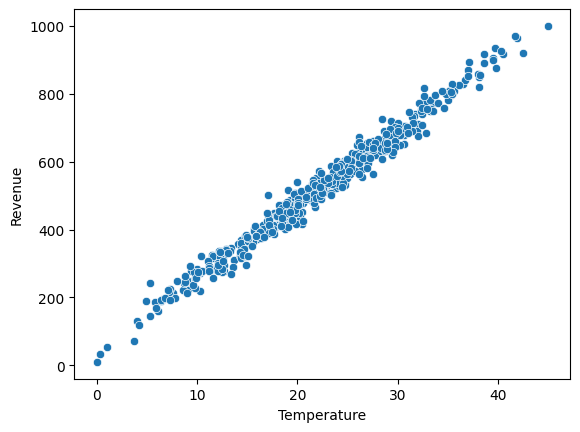

In [6]:
# Visualizar los datos
sns.scatterplot(data=sales_df, x='Temperature', y='Revenue')

In [7]:
# Dataset para entrenamiento
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [8]:
# Crear el modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

# Resumen del modelo
model.summary()

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

/opt/anaconda3/envs/proyecto_modelos/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 298496.7500
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248681.5156 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 213309.9062 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 183274.0156 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 147197.3125 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122730.3750 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 108244.3984
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84725.3281 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67975.6016 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57277.4023 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44854.5703 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37091.6016 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 31177.3750
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/

In [10]:
# Visualizar los resultados
keys = history.history.keys()

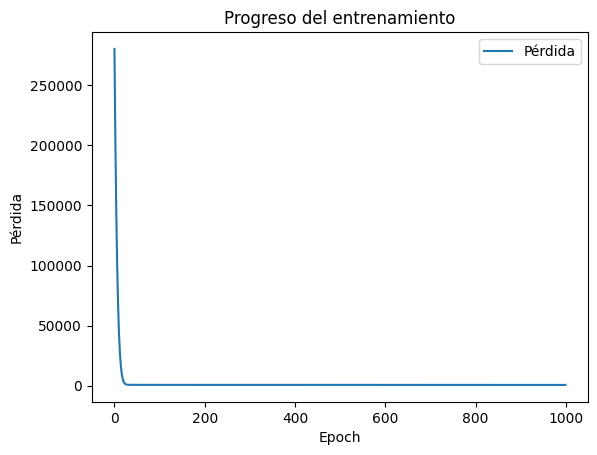

In [11]:
# Graficar el entrenamiento
plt.plot(history.history['loss'])
plt.title('Progreso del entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(['Pérdida'])

In [12]:
# Obtener pesos
weights = model.get_weights()
weights

[array([[21.400465]], dtype=float32), array([44.791412], dtype=float32)]

In [13]:
# Predicción
temp = 35
revenue = model.predict(np.array([temp])).item()
print('La ganancia según la red neuronal es de:', int(revenue))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
La ganancia según la red neuronal es de: 793


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


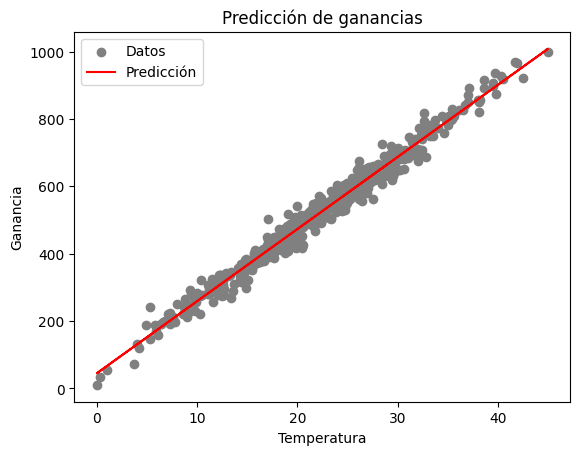

In [14]:
# Visualizar la predicción
plt.scatter(x_train, y_train, color='gray', label='Datos')
plt.plot(x_train, model.predict(x_train), color='red', label='Predicción')
plt.title('Predicción de ganancias')
plt.xlabel('Temperatura')
plt.ylabel('Ganancia')
plt.legend()
plt.show()